Part 2 : Download the dataset about all S&P 500 companies https://ies-python-midterm.s3.eucentral-
1.amazonaws.com/companies/companies_no_subindustry.csv . Note that
pd.read_csv can directly read URLs.

In [15]:
import pandas as pd

df = pd.read_csv('C:/Users/Pragya Acharya/PythonDataIES/companies_no_subindustry.csv')

print(df.head())

  Symbol     Security  GICS Sector                       hq    included  \
0    MMM           3M  Industrials    Saint Paul, Minnesota  09.08.1976   
1    AOS  A. O. Smith  Industrials     Milwaukee, Wisconsin  26.07.2017   
2    ABT       Abbott  Health Care  North Chicago, Illinois  31.03.1964   
3   ABBV       AbbVie  Health Care  North Chicago, Illinois  31.12.2012   
4   ABMD      Abiomed  Health Care   Danvers, Massachusetts  31.05.2018   

       Founded  
0         1902  
1         1916  
2         1888  
3  2013 (1888)  
4         1981  


1. Find out how many companies do not filled-in the date of inclusion (column “included”) to S&P 500.

In [17]:
num_missing = df["included"].isna().sum()
print(f"There are {num_missing} companies without a date of inclusion in the S&P 500.")

There are 45 companies without a date of inclusion in the S&P 500.


2. Delete the companies with no inclusion date and calculate which company is the oldest/youngest constituent and tell us the average age of a constituent in the sample.If you need to fix anything or make any assumptions, comment on them in the code. Hint: pd.to_datetime (some date column, dayfirst=True,errors='coerce')

In [31]:
# Dropping companies with no inclusion date
df = df.dropna(subset=["included"])

# convert "included" to datetime
df["Founded"] = pd.to_datetime(df["Founded"], dayfirst=True,errors='coerce')

# calculate the age of each company in years
df["age"] = (pd.to_datetime("today") - df["Founded"]).dt.days / 365

# calculate the oldest and youngest companies
oldest = df.loc[df["age"].idxmax()]
youngest = df.loc[df["age"].idxmin()]

# calculate the average age
avg_age = df["age"].mean()

# print the results
print(f"The oldest constituent is {oldest['Name']} (age {oldest['age']:.2f} years)")
print(f"The youngest constituent is {youngest['Name']} (age {youngest['age']:.2f} years)")
print(f"The average age of a constituent is {avg_age:.2f} years")

KeyError: 'Name'

3. Describe the distribution of companies across sectors and create a plot that demonstrates the proportionality of the sectors (i.e. pie plot, or something like this)

In [34]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


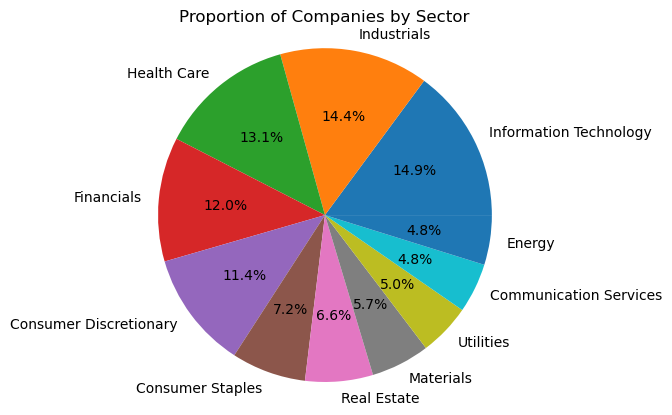

In [38]:
import matplotlib.pyplot as plt

sector_counts = df["GICS Sector"].value_counts()

plt.pie(sector_counts.values, labels=sector_counts.index, autopct='%1.1f%%')
plt.title("Proportion of Companies by Sector")
plt.axis('equal')
plt.show()


4. Parse the “hq” column, extract the state of the hq and describe the distribution of the states

In [39]:
df["state"] = df["hq"].str.split(", ").str[-1]

# distribution of states
state_counts = df["state"].value_counts()
print(state_counts)

California                             65
New York                               44
Texas                                  40
Illinois                               31
Pennsylvania                           19
Massachusetts                          18
Ohio                                   17
North Carolina                         16
Georgia                                16
New Jersey                             15
Virginia                               15
Florida                                14
Minnesota                              13
Connecticut                            13
Washington                             12
Michigan                               10
Tennessee                               7
Colorado                                7
Ireland                                 7
Missouri                                6
Indiana                                 6
Wisconsin                               6
Arizona                                 5
Maryland                          

5. Join the dataset with this one: https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv And join the two datasets based on an appropriate key. Report on distribution of subindustries for the “Consumer Discretionary” GICS sector.

In [46]:
# read in the companies subindustry dataset
subindustry_df = pd.read_csv('C:/Users/Pragya Acharya/PythonDataIES/companies_subindustry.csv')

# merge the datasets based on the Ticker Symbol and Ticker columns
merged_df = pd.merge(df, subindustry_df, left_on='Symbol', right_on='Symbol', how='inner')

# filter for only the "Consumer Discretionary" GICS sector
consumer_discretionary_df = merged_df[merged_df['GICS Sector'] == 'Consumer Discretionary']

# describe the distribution of subindustries for the "Consumer Discretionary" GICS sector
subindustry_counts = consumer_discretionary_df['subindustry'].value_counts()
print(subindustry_counts)

Specialty Stores                       6
Restaurants                            5
Internet & Direct Marketing Retail     5
Casinos & Gaming                       4
Hotels, Resorts & Cruise Lines         4
Homebuilding                           4
General Merchandise Stores             3
Apparel, Accessories & Luxury Goods    3
Automobile Manufacturers               3
Home Improvement Retail                2
Distributors                           2
Automotive Retail                      2
Auto Parts & Equipment                 2
Apparel Retail                         2
Leisure Products                       1
Consumer Electronics                   1
Computer & Electronics Retail          1
Home Furnishings                       1
Housewares & Specialties               1
Name: subindustry, dtype: int64


Part 1 :